In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Pollutants Dataset

In [ ]:
pollutants = pd.read_csv('/content/drive/MyDrive/Datasets/city_day.csv')
pollutants.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Pollutants training data (2016-19)

In [ ]:
pollutants = pollutants[(pollutants['Date'] > '2015-12-31') & (pollutants['Date'] < '2020-01-01') & (pollutants['City'] == 'Bengaluru')]
pollutants

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4659,Bengaluru,2016-01-01,56.40,95.08,13.80,51.73,34.31,14.68,0.69,7.44,55.96,0.91,0.78,NaN,101.0,Moderate
4660,Bengaluru,2016-01-02,53.69,93.92,26.49,73.09,54.77,16.05,0.76,8.67,34.06,1.88,1.18,NaN,92.0,Satisfactory
4661,Bengaluru,2016-01-03,62.35,99.34,24.56,77.77,55.60,16.37,0.96,9.10,47.62,2.36,1.14,NaN,108.0,Moderate
4662,Bengaluru,2016-01-04,64.96,104.62,18.56,77.07,50.81,14.18,0.89,8.87,50.62,1.95,1.33,NaN,109.0,Moderate
4663,Bengaluru,2016-01-05,70.15,105.12,23.56,79.43,56.05,16.97,0.85,9.41,36.94,1.92,1.26,NaN,114.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Bengaluru,2019-12-27,43.32,87.09,9.56,31.24,32.59,14.71,1.09,6.60,39.42,1.66,41.25,NaN,98.0,Satisfactory
6116,Bengaluru,2019-12-28,35.24,70.75,7.86,26.94,27.78,13.37,0.97,7.38,37.81,0.93,44.93,NaN,82.0,Satisfactory
6117,Bengaluru,2019-12-29,38.53,73.77,6.56,26.20,26.31,13.02,0.92,7.39,43.50,0.63,23.56,NaN,80.0,Satisfactory
6118,Bengaluru,2019-12-30,47.81,77.49,6.40,28.46,27.79,12.91,1.03,8.04,44.92,0.62,24.96,NaN,93.0,Satisfactory


In [ ]:
pollutants = pollutants.reset_index(drop=True)
pollutants.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,2016-01-01,56.40,95.08,13.80,51.73,34.31,14.68,0.69,7.44,55.96,0.91,0.78,NaN,101.0,Moderate
1,Bengaluru,2016-01-02,53.69,93.92,26.49,73.09,54.77,16.05,0.76,8.67,34.06,1.88,1.18,NaN,92.0,Satisfactory
2,Bengaluru,2016-01-03,62.35,99.34,24.56,77.77,55.60,16.37,0.96,9.10,47.62,2.36,1.14,NaN,108.0,Moderate
3,Bengaluru,2016-01-04,64.96,104.62,18.56,77.07,50.81,14.18,0.89,8.87,50.62,1.95,1.33,NaN,109.0,Moderate
4,Bengaluru,2016-01-05,70.15,105.12,23.56,79.43,56.05,16.97,0.85,9.41,36.94,1.92,1.26,NaN,114.0,Moderate


In [ ]:
pollutants['Date'] = pd.to_datetime(pollutants['Date'], format='%Y-%m-%d')

In [ ]:
pollutants = pollutants.set_index('Date')
pollutants.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2016-01-01,Bengaluru,56.40,95.08,13.80,51.73,34.31,14.68,0.69,7.44,55.96,0.91,0.78,NaN,101.0,Moderate
2016-01-02,Bengaluru,53.69,93.92,26.49,73.09,54.77,16.05,0.76,8.67,34.06,1.88,1.18,NaN,92.0,Satisfactory
2016-01-03,Bengaluru,62.35,99.34,24.56,77.77,55.60,16.37,0.96,9.10,47.62,2.36,1.14,NaN,108.0,Moderate
2016-01-04,Bengaluru,64.96,104.62,18.56,77.07,50.81,14.18,0.89,8.87,50.62,1.95,1.33,NaN,109.0,Moderate
2016-01-05,Bengaluru,70.15,105.12,23.56,79.43,56.05,16.97,0.85,9.41,36.94,1.92,1.26,NaN,114.0,Moderate


In [ ]:
pollutants = pollutants.drop(columns=['City', 'NH3','NO', 'Benzene',	'Toluene',	'Xylene', 'AQI_Bucket'])
pollutants.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,101.0
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,92.0
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,108.0
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,109.0
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,114.0


In [ ]:
pollutants.tail()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2019-12-27,43.32,87.09,31.24,32.59,1.09,6.60,39.42,98.0
2019-12-28,35.24,70.75,26.94,27.78,0.97,7.38,37.81,82.0
2019-12-29,38.53,73.77,26.20,26.31,0.92,7.39,43.50,80.0
2019-12-30,47.81,77.49,28.46,27.79,1.03,8.04,44.92,93.0
2019-12-31,42.54,84.76,29.10,27.48,1.06,7.58,45.78,97.0


In [ ]:
pollutants.shape
# 2016=leap year, so (365*3)+366 = 1461 days i.e. 1461 rows in dataset

(1461, 8)

## Load Climate Dataset

In [ ]:
climate = pd.read_csv('/content/drive/MyDrive/Datasets/climate-training-dataset.csv')
climate

,Date,T,TM,Tm,H,VV,V,VM
0,01-01-2016,20.1,28.4,15.7,54,6,3,5.4
1,02-01-2016,20.8,28.3,12.9,45,6.3,1.1,5.4
2,03-01-2016,21.4,29,13.7,45,6.3,0.4,3.5
3,04-01-2016,21.5,29,15.2,47,6.9,2.2,5.4
4,05-01-2016,20.9,28.4,14.7,51,6.3,1.1,5.4
...,...,...,...,...,...,...,...,...
1456,27-12-2019,23.4,29.6,18,66,6.6,2.2,5.4
1457,28-12-2019,21.9,29.8,17.6,67,6.9,2.8,5.4
1458,29-12-2019,21.8,28.2,16.8,66,6.9,3.1,3.5
1459,30-12-2019,21.7,27.6,17.5,70,6.3,3.9,7.6


In [ ]:
climate['Date'] = pd.to_datetime(climate['Date'], format='%d-%m-%Y')

In [ ]:
climate = climate.set_index('Date')
climate.head()

,T,TM,Tm,H,VV,V,VM
Date,,,,,,,
2016-01-01,20.1,28.4,15.7,54,6,3,5.4
2016-01-02,20.8,28.3,12.9,45,6.3,1.1,5.4
2016-01-03,21.4,29,13.7,45,6.3,0.4,3.5
2016-01-04,21.5,29,15.2,47,6.9,2.2,5.4
2016-01-05,20.9,28.4,14.7,51,6.3,1.1,5.4


In [ ]:
climate.shape

(1461, 7)

In [ ]:
climate = climate.drop(columns=['VM'])
climate.head()

,T,TM,Tm,H,VV,V
Date,,,,,,
2016-01-01,20.1,28.4,15.7,54,6,3
2016-01-02,20.8,28.3,12.9,45,6.3,1.1
2016-01-03,21.4,29,13.7,45,6.3,0.4
2016-01-04,21.5,29,15.2,47,6.9,2.2
2016-01-05,20.9,28.4,14.7,51,6.3,1.1


## Feature Engineering

#### Concatenate the two dataframes

In [ ]:
(climate.index==pollutants.index).all() 

True

In [ ]:
df = pd.concat([pollutants, climate], axis = 1)
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,T,TM,Tm,H,VV,V
Date,,,,,,,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,101.0,20.1,28.4,15.7,54,6,3
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,92.0,20.8,28.3,12.9,45,6.3,1.1
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,108.0,21.4,29,13.7,45,6.3,0.4
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,109.0,21.5,29,15.2,47,6.9,2.2
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,114.0,20.9,28.4,14.7,51,6.3,1.1


In [ ]:
df.shape

(1461, 14)

In [ ]:
target = df['AQI']
target.head()

Date
2016-01-01    101.0
2016-01-02     92.0
2016-01-03    108.0
2016-01-04    109.0
2016-01-05    114.0
Name: AQI, dtype: float64

In [ ]:
target.shape

(1461,)

In [ ]:
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,T,TM,Tm,H,VV,V
Date,,,,,,,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,101.0,20.1,28.4,15.7,54,6,3
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,92.0,20.8,28.3,12.9,45,6.3,1.1
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,108.0,21.4,29,13.7,45,6.3,0.4
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,109.0,21.5,29,15.2,47,6.9,2.2
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,114.0,20.9,28.4,14.7,51,6.3,1.1


In [ ]:
df.shape

(1461, 14)

In [ ]:
# df.to_csv('x_train_data.csv')
# target.to_csv('y_train_data.csv')

In [ ]:
temp_df = df
temp_target = target

#### Rename column names

In [ ]:
df.rename(columns={'T':'temp', 'TM':'max_temp','Tm':'min_temp','H':'humid','VV':'visible','V':'wind'}, inplace = True)
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,101.0,20.1,28.4,15.7,54,6,3
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,92.0,20.8,28.3,12.9,45,6.3,1.1
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,108.0,21.4,29,13.7,45,6.3,0.4
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,109.0,21.5,29,15.2,47,6.9,2.2
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,114.0,20.9,28.4,14.7,51,6.3,1.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2016-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     1394 non-null   float64
 1   PM10      1416 non-null   float64
 2   NO2       1455 non-null   float64
 3   NOx       1457 non-null   float64
 4   CO        1457 non-null   float64
 5   SO2       1455 non-null   float64
 6   O3        1324 non-null   float64
 7   AQI       1441 non-null   float64
 8   temp      1461 non-null   object 
 9   max_temp  1461 non-null   object 
 10  min_temp  1461 non-null   object 
 11  humid     1461 non-null   object 
 12  visible   1461 non-null   object 
 13  wind      1461 non-null   object 
dtypes: float64(8), object(6)
memory usage: 171.2+ KB


In [ ]:
for column in df.columns[7:]:
  df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2016-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     1394 non-null   float64
 1   PM10      1416 non-null   float64
 2   NO2       1455 non-null   float64
 3   NOx       1457 non-null   float64
 4   CO        1457 non-null   float64
 5   SO2       1455 non-null   float64
 6   O3        1324 non-null   float64
 7   AQI       1441 non-null   float64
 8   temp      1446 non-null   float64
 9   max_temp  1446 non-null   float64
 10  min_temp  1446 non-null   float64
 11  humid     1446 non-null   float64
 12  visible   1446 non-null   float64
 13  wind      1446 non-null   float64
dtypes: float64(14)
memory usage: 171.2 KB


In [ ]:
df.describe()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
count,1394.000000,1416.000000,1455.000000,1457.000000,1457.000000,1455.000000,1324.000000,1441.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,37.978293,85.900028,30.848027,20.310981,1.046706,5.169285,34.340083,92.549618,24.290941,30.360443,19.871369,63.865145,6.616390,4.584855
std,23.930548,39.127126,12.878299,16.514174,2.005378,2.234012,17.622812,38.221982,2.294894,2.919894,2.306992,15.425335,0.630561,2.704718
min,1.720000,9.930000,3.000000,0.000000,0.000000,0.870000,3.140000,20.000000,18.900000,21.600000,12.000000,17.000000,3.700000,0.000000
25%,22.360000,57.552500,22.755000,3.970000,0.680000,3.855000,20.137500,66.000000,22.700000,28.200000,18.600000,51.250000,6.300000,2.800000
50%,32.730000,79.840000,29.500000,21.460000,0.860000,4.870000,31.155000,85.000000,23.800000,29.700000,20.200000,66.000000,6.900000,4.100000
75%,46.860000,107.425000,36.595000,30.140000,1.020000,6.125000,47.345000,111.000000,25.600000,32.200000,21.200000,76.000000,6.900000,5.900000
max,313.590000,351.510000,142.350000,147.060000,47.930000,24.020000,109.970000,352.000000,31.400000,39.200000,25.800000,97.000000,9.200000,14.800000


#### NOx, CO and wind speed have 0 values

In [ ]:
df.replace(0,np.nan, inplace=True)

### Handle Missing Values

In [ ]:
df.isnull().sum(axis=0)

PM2.5        67
PM10         45
NO2           6
NOx         341
CO           12
SO2           6
O3          137
AQI          20
temp         15
max_temp     15
min_temp     15
humid        15
visible      15
wind         22
dtype: int64

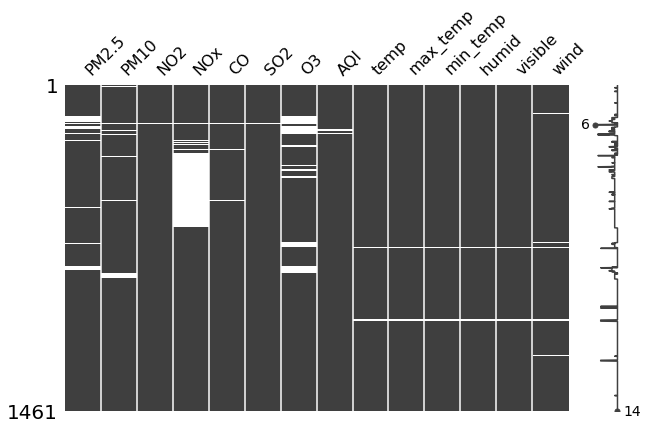

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(10,6))
plt.show()

Delete rows where AQI value is NaN

In [ ]:
df = df.loc[~df['AQI'].isna()]
df.shape
# 20 rows deleted

(1441, 14)

In [ ]:
target = target.loc[~target.isna()]
target.shape

(1441,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2016-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     1387 non-null   float64
 1   PM10      1403 non-null   float64
 2   NO2       1440 non-null   float64
 3   NOx       1102 non-null   float64
 4   CO        1433 non-null   float64
 5   SO2       1440 non-null   float64
 6   O3        1320 non-null   float64
 7   AQI       1441 non-null   float64
 8   temp      1426 non-null   float64
 9   max_temp  1426 non-null   float64
 10  min_temp  1426 non-null   float64
 11  humid     1426 non-null   float64
 12  visible   1426 non-null   float64
 13  wind      1419 non-null   float64
dtypes: float64(14)
memory usage: 168.9 KB


#### Interpolate the missing values
bfill, ffill, interpolate

Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the ebst possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

In [ ]:
df.interpolate(limit_direction="both", inplace=True)
df.isnull().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


PM2.5       0
PM10        0
NO2         0
NOx         0
CO          0
SO2         0
O3          0
AQI         0
temp        0
max_temp    0
min_temp    0
humid       0
visible     0
wind        0
dtype: int64

In [ ]:
df.shape

(1441, 14)

### Visualization

In [ ]:
df.plot(subplots=True, layout=(5,3),figsize=(22,18))
plt.show()

Climatic conditions shows seasonal variation

Pollutants data show white noise i.e. no seasonality,trend,cyclic pattern

In [ ]:
df.describe()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,38.516197,86.403688,30.930035,21.236298,1.052817,5.190704,34.729306,92.549618,24.284629,30.364851,19.864920,63.846287,6.605378,4.567071
std,25.512296,38.848527,12.821305,15.460293,2.013404,2.231657,17.781051,38.221982,2.304382,2.932811,2.322212,15.450047,0.635529,2.696078
min,1.720000,9.930000,3.000000,0.470000,0.080000,1.060000,3.140000,20.000000,18.900000,21.600000,12.000000,17.000000,3.700000,0.200000
25%,22.490000,58.260000,22.840000,6.009755,0.680000,3.870000,20.490000,66.000000,22.700000,28.200000,18.600000,51.000000,6.300000,2.800000
50%,32.610000,80.700000,29.530000,21.490000,0.860000,4.900000,31.123913,85.000000,23.800000,29.700000,20.200000,66.000000,6.900000,3.900000
75%,46.940000,107.540000,36.610000,30.040000,1.020000,6.140000,47.770000,111.000000,25.600000,32.200000,21.200000,76.000000,6.900000,5.900000
max,313.590000,351.510000,142.350000,147.060000,47.930000,24.020000,109.970000,352.000000,31.400000,39.200000,25.800000,97.000000,9.200000,14.800000


In [ ]:
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,101.0,20.1,28.4,15.7,54.0,6.0,3.0
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,92.0,20.8,28.3,12.9,45.0,6.3,1.1
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,108.0,21.4,29.0,13.7,45.0,6.3,0.4
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,109.0,21.5,29.0,15.2,47.0,6.9,2.2
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,114.0,20.9,28.4,14.7,51.0,6.3,1.1


### Delete AQI col from independent features

In [ ]:
df = df.drop(columns=['AQI'])
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,
2016-01-01,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
2016-01-02,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2016-01-03,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
2016-01-04,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
2016-01-05,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [ ]:
# df.to_csv('train_x.csv')
# target.to_csv('train_y.csv')

### Standard Scaler

In [ ]:
# [1,2,2] will become [[1],[2],[2]]

In [ ]:
df.shape,target.values.reshape(-1,1).shape

((1441, 13), (1441, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_target = StandardScaler()

X_scaler = sc.fit_transform(df)
Y_scaler = sc_target.fit_transform(target.values.reshape(-1,1))
# StandardScaler take 2D array

In [ ]:
type(X_scaler), type(Y_scaler)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_scaler[0]

array([ 0.70123094,  0.22341448,  1.62286025,  0.84592452, -0.18026357,
        1.00825383,  1.19442119, -1.81657462, -0.67018747, -1.79413706,
       -0.63751945, -0.95288902, -0.58144294])

In [ ]:
Y_scaler

array([[ 0.22116371],
       [-0.01438463],
       [ 0.40436797],
       ...,
       [-0.32844908],
       [ 0.01178741],
       [ 0.11647556]])

In [ ]:
X_scaler.shape, Y_scaler.shape

((1441, 13), (1441, 1))

In [ ]:
def custom_dataset(dataset, target, start, end, previous, future):
  X = []
  y = []
  start = start + previous
  end = end - future + 1
  #  if end is None:
  for i in range(start, end):
      indices_x = range(i-previous, i)
      X.append(dataset[indices_x])
      indices_y = range(i, i+future)
      y.append(target[indices_y])
  return np.array(X), np.array(y)

In [ ]:
prev = 7
future = 1
start = 0
end = X_scaler.shape[0]-1

X_train, Y_train = custom_dataset(X_scaler, Y_scaler, start, end, prev, future)
X_train[:1]

array([[[ 0.70123094,  0.22341448,  1.62286025,  0.84592452,
         -0.18026357,  1.00825383,  1.19442119, -1.81657462,
         -0.67018747, -1.79413706, -0.63751945, -0.95288902,
         -0.58144294],
        [ 0.59497078,  0.19354456,  3.28941567,  2.16977412,
         -0.14548452,  1.5596052 , -0.0376546 , -1.51270006,
         -0.70429629, -3.00030274, -1.22024417, -0.48067727,
         -1.28641499],
        [ 0.93453278,  0.33310922,  3.65455984,  2.22347867,
         -0.04611578,  1.75235405,  0.72521972, -1.25223614,
         -0.46553454, -2.65568398, -1.22024417, -0.48067727,
         -1.54614153],
        [ 1.0368719 ,  0.46906889,  3.59994426,  1.91354517,
         -0.08089484,  1.64925583,  0.89399723, -1.20882549,
         -0.46553454, -2.00952379, -1.09074978,  0.46374624,
         -0.87827328],
        [ 1.24037384,  0.48194386,  3.78407679,  2.2525956 ,
         -0.10076859,  1.89131253,  0.1243718 , -1.46928941,
         -0.67018747, -2.22491052, -0.83176102, -0.480

In [ ]:
X_train.shape, Y_train.shape

((1433, 7, 13), (1433, 1, 1))

# PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable 

In [ ]:
X_train_tensors = Variable(torch.Tensor(X_train))
y_train_tensors = Variable(torch.Tensor(Y_train))

In [ ]:
X_train_tensors.size(), y_train_tensors.size()

(torch.Size([1433, 7, 13]), torch.Size([1433, 1, 1]))

In [ ]:
y_train_tensors = torch.reshape(y_train_tensors, (-1,future))
y_train_tensors

tensor([[ 0.6399],
        [ 1.3204],
        [ 1.9747],
        ...,
        [-0.2761],
        [-0.3284],
        [ 0.0118]])

In [ ]:
y_train_tensors.size()

torch.Size([1433, 1])

In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=0.5, batch_first=True) #lstm
        self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True) #lstm

        self.fc_1 =  nn.Linear(hidden_size, 128) 

        self.fc_2 =  nn.Linear(128, 64)

        self.fc = nn.Linear(64, num_classes)

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.randn(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.randn(self.num_layers, x.size(0), self.hidden_size))
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        output, (hn, cn) = self.lstm2(output, (hn, cn))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 

        out = self.fc_2(out)
        out = self.relu(out)

        out = self.fc(out) 
        return out

In [ ]:
num_epochs = 1000 
learning_rate = 0.001

input_size = 13 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [ ]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors.shape[1]) 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
# loss fn
criterion = torch.nn.MSELoss()    
# optimizer
#  the learnable parameters (i.e. weights and biases) of a torch.nn.Module model are contained in the model’s parameters 
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [ ]:
lstm1

LSTM1(
  (lstm): LSTM(13, 2, batch_first=True, dropout=0.5)
  (lstm2): LSTM(2, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
for epoch in range(num_epochs):
  # pred values 
  outputs = lstm1.forward(X_train_tensors)

  # for every new batch, set grad of learnable parameters inside nn.module model=0
  optimizer.zero_grad()

  # calculate loss
  loss = criterion(outputs, y_train_tensors)
 
  # computes the gradient of loss wrt learnable parameters x and save values in x.grad
  loss.backward() 
 
#  update the weights,lr
  optimizer.step() 

  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 1.01282
Epoch: 100, loss: 0.71647
Epoch: 200, loss: 0.63514
Epoch: 300, loss: 0.55181
Epoch: 400, loss: 0.48856
Epoch: 500, loss: 0.42898
Epoch: 600, loss: 0.39081
Epoch: 700, loss: 0.36060
Epoch: 800, loss: 0.32517
Epoch: 900, loss: 0.31144


In [ ]:
outputs.shape, y_train_tensors.shape

(torch.Size([1433, 1]), torch.Size([1433, 1]))

In [ ]:
print(len(outputs))

1433


In [ ]:
outputs # predicted by lstm

tensor([[ 0.8922],
        [ 0.3571],
        [ 2.0806],
        ...,
        [ 0.0150],
        [-0.2990],
        [-0.1483]], grad_fn=<AddmmBackward0>)

# Testing Dataset

In [ ]:
pollutants = pd.read_csv('/content/drive/MyDrive/Datasets/city_day.csv')
pollutants.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
pollutants = pollutants[(pollutants['Date'] > '2019-12-31') & (pollutants['City'] == 'Bengaluru')]
pollutants

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
6120,Bengaluru,2020-01-01,30.71,70.80,9.03,27.31,26.74,13.01,1.07,8.56,37.39,1.05,36.19,NaN,82.0,Satisfactory
6121,Bengaluru,2020-01-02,25.78,62.73,8.81,28.05,30.18,12.40,1.16,7.52,33.11,0.95,34.36,NaN,81.0,Satisfactory
6122,Bengaluru,2020-01-03,29.66,69.62,6.62,26.26,26.92,12.87,0.99,6.40,32.98,1.06,29.06,NaN,85.0,Satisfactory
6123,Bengaluru,2020-01-04,52.62,106.81,15.46,31.56,41.89,14.59,1.39,6.94,37.35,1.50,35.36,NaN,95.0,Satisfactory
6124,Bengaluru,2020-01-05,52.64,97.94,6.86,29.10,29.52,15.68,1.01,7.01,45.10,1.19,39.99,NaN,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Bengaluru,2020-06-27,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,NaN,51.0,Satisfactory
6299,Bengaluru,2020-06-28,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,NaN,61.0,Satisfactory
6300,Bengaluru,2020-06-29,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,NaN,65.0,Satisfactory
6301,Bengaluru,2020-06-30,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,NaN,63.0,Satisfactory


In [ ]:
pollutants = pollutants.reset_index(drop=True)
pollutants['Date'] = pd.to_datetime(pollutants['Date'], format='%Y-%m-%d')
pollutants = pollutants.set_index('Date')
pollutants = pollutants.drop(columns=['City', 'NH3','NO', 'Benzene',	'Toluene',	'Xylene', 'AQI_Bucket'])

In [ ]:
pollutants.iloc[-1,:]

PM2.5    17.50
PM10     30.48
NO2      13.25
NOx      14.83
CO        0.54
SO2       6.66
O3       15.40
AQI      43.00
Name: 2020-07-01 00:00:00, dtype: float64

In [ ]:
pollutants = pollutants.iloc[:-1,:]

In [ ]:
pollutants.shape

(182, 8)

In [ ]:
pollutants.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2020-01-01,30.71,70.80,27.31,26.74,1.07,8.56,37.39,82.0
2020-01-02,25.78,62.73,28.05,30.18,1.16,7.52,33.11,81.0
2020-01-03,29.66,69.62,26.26,26.92,0.99,6.40,32.98,85.0
2020-01-04,52.62,106.81,31.56,41.89,1.39,6.94,37.35,95.0
2020-01-05,52.64,97.94,29.10,29.52,1.01,7.01,45.10,118.0


In [ ]:
pollutants.tail()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2020-06-26,15.40,28.66,14.29,15.57,0.61,7.45,19.53,58.0
2020-06-27,16.60,29.48,13.68,13.07,0.67,7.29,15.69,51.0
2020-06-28,20.44,26.34,10.33,10.58,0.66,6.60,17.59,61.0
2020-06-29,28.68,29.27,12.12,12.94,0.56,6.33,16.99,65.0
2020-06-30,14.47,24.26,12.69,15.00,0.56,6.45,16.08,63.0


In [ ]:
climate = pd.read_csv('/content/drive/MyDrive/Datasets/climate-testing-dataset.csv')
climate

,Date,T,TM,Tm,H,VV,V,VM
0,01-01-2020,22.0,27.2,19.2,75,6.9,3.3,5.4
1,02-01-2020,22.2,26.0,19.4,77,5.5,2.0,5.4
2,03-01-2020,23.4,28.4,19.4,68,6.9,3.5,5.4
3,04-01-2020,23.6,30.5,19.0,63,6.3,1.3,3.5
4,05-01-2020,24.2,30.5,20.4,63,6.3,1.3,3.5
...,...,...,...,...,...,...,...,...
177,26-06-2020,24.2,30.4,20.4,79,7.7,3.7,9.4
178,27-06-2020,24.4,29.2,21.0,78,6.9,6.3,9.4
179,28-06-2020,24.8,29.0,21.4,78,5.5,5.4,9.4
180,29-06-2020,23.6,30.0,12.3,83,6.9,4.8,7.6


In [ ]:
climate['Date'] = pd.to_datetime(climate['Date'], format='%d-%m-%Y')
climate = climate.set_index('Date')
climate = climate.drop(columns=['VM'])

climate.head()

,T,TM,Tm,H,VV,V
Date,,,,,,
2020-01-01,22.0,27.2,19.2,75,6.9,3.3
2020-01-02,22.2,26.0,19.4,77,5.5,2.0
2020-01-03,23.4,28.4,19.4,68,6.9,3.5
2020-01-04,23.6,30.5,19.0,63,6.3,1.3
2020-01-05,24.2,30.5,20.4,63,6.3,1.3


In [ ]:
climate.shape

(182, 6)

In [ ]:
(climate.index==pollutants.index).all() 

True

In [ ]:
test_df = pd.concat([pollutants, climate], axis = 1)
test_df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,T,TM,Tm,H,VV,V
Date,,,,,,,,,,,,,,
2020-01-01,30.71,70.80,27.31,26.74,1.07,8.56,37.39,82.0,22.0,27.2,19.2,75,6.9,3.3
2020-01-02,25.78,62.73,28.05,30.18,1.16,7.52,33.11,81.0,22.2,26.0,19.4,77,5.5,2.0
2020-01-03,29.66,69.62,26.26,26.92,0.99,6.40,32.98,85.0,23.4,28.4,19.4,68,6.9,3.5
2020-01-04,52.62,106.81,31.56,41.89,1.39,6.94,37.35,95.0,23.6,30.5,19.0,63,6.3,1.3
2020-01-05,52.64,97.94,29.10,29.52,1.01,7.01,45.10,118.0,24.2,30.5,20.4,63,6.3,1.3


In [ ]:
test_df.shape

(182, 14)

In [ ]:
test_target = test_df['AQI']
test_target.head()

Date
2020-01-01     82.0
2020-01-02     81.0
2020-01-03     85.0
2020-01-04     95.0
2020-01-05    118.0
Name: AQI, dtype: float64

In [ ]:
test_target.shape

(182,)

In [ ]:
test_df.rename(columns={'T':'temp', 'TM':'max_temp','Tm':'min_temp','H':'humid','VV':'visible','V':'wind'}, inplace = True)

In [ ]:
test_df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,,
2020-01-01,30.71,70.80,27.31,26.74,1.07,8.56,37.39,82.0,22.0,27.2,19.2,75,6.9,3.3
2020-01-02,25.78,62.73,28.05,30.18,1.16,7.52,33.11,81.0,22.2,26.0,19.4,77,5.5,2.0
2020-01-03,29.66,69.62,26.26,26.92,0.99,6.40,32.98,85.0,23.4,28.4,19.4,68,6.9,3.5
2020-01-04,52.62,106.81,31.56,41.89,1.39,6.94,37.35,95.0,23.6,30.5,19.0,63,6.3,1.3
2020-01-05,52.64,97.94,29.10,29.52,1.01,7.01,45.10,118.0,24.2,30.5,20.4,63,6.3,1.3


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2020-01-01 to 2020-06-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     182 non-null    float64
 1   PM10      182 non-null    float64
 2   NO2       182 non-null    float64
 3   NOx       182 non-null    float64
 4   CO        182 non-null    float64
 5   SO2       182 non-null    float64
 6   O3        182 non-null    float64
 7   AQI       182 non-null    float64
 8   temp      182 non-null    float64
 9   max_temp  182 non-null    float64
 10  min_temp  182 non-null    float64
 11  humid     182 non-null    int64  
 12  visible   182 non-null    float64
 13  wind      182 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 21.3 KB


In [ ]:
df['humid'].astype('float64')
test_df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,,
2020-01-01,30.71,70.80,27.31,26.74,1.07,8.56,37.39,82.0,22.0,27.2,19.2,75,6.9,3.3
2020-01-02,25.78,62.73,28.05,30.18,1.16,7.52,33.11,81.0,22.2,26.0,19.4,77,5.5,2.0
2020-01-03,29.66,69.62,26.26,26.92,0.99,6.40,32.98,85.0,23.4,28.4,19.4,68,6.9,3.5
2020-01-04,52.62,106.81,31.56,41.89,1.39,6.94,37.35,95.0,23.6,30.5,19.0,63,6.3,1.3
2020-01-05,52.64,97.94,29.10,29.52,1.01,7.01,45.10,118.0,24.2,30.5,20.4,63,6.3,1.3


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2020-01-01 to 2020-06-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     182 non-null    float64
 1   PM10      182 non-null    float64
 2   NO2       182 non-null    float64
 3   NOx       182 non-null    float64
 4   CO        182 non-null    float64
 5   SO2       182 non-null    float64
 6   O3        182 non-null    float64
 7   AQI       182 non-null    float64
 8   temp      182 non-null    float64
 9   max_temp  182 non-null    float64
 10  min_temp  182 non-null    float64
 11  humid     182 non-null    int64  
 12  visible   182 non-null    float64
 13  wind      182 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 21.3 KB


In [ ]:
test_df.describe()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI,temp,max_temp,min_temp,humid,visible,wind
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,30.536703,67.232473,21.455000,22.636154,0.873132,6.875495,35.748626,79.917582,25.422527,32.191209,20.293407,56.510989,6.662637,3.563736
std,12.255324,24.453075,10.194596,10.470600,0.198321,1.090536,11.404644,19.336760,2.068492,2.322299,2.314442,14.027494,0.619864,2.092925
min,8.950000,19.340000,8.990000,9.400000,0.540000,4.440000,12.340000,40.000000,20.800000,26.000000,12.300000,29.000000,4.000000,0.000000
25%,20.620000,49.900000,13.127500,14.505000,0.720000,6.192500,29.947500,66.000000,23.725000,30.400000,18.650000,46.000000,6.300000,2.000000
50%,28.010000,65.310000,17.340000,17.230000,0.850000,6.850000,36.870000,77.000000,25.200000,32.400000,20.750000,55.000000,6.900000,3.100000
75%,39.472500,84.680000,29.072500,30.342500,1.037500,7.285000,43.837500,94.750000,27.175000,34.000000,22.000000,68.000000,6.900000,4.375000
max,70.780000,154.340000,54.430000,56.070000,1.390000,13.040000,61.010000,137.000000,29.600000,36.400000,24.600000,83.000000,8.900000,11.300000


In [ ]:
test_df.isnull().sum(axis=0)

PM2.5       0
PM10        0
NO2         0
NOx         0
CO          0
SO2         0
O3          0
AQI         0
temp        0
max_temp    0
min_temp    0
humid       0
visible     0
wind        0
dtype: int64

In [ ]:
test_df = test_df.drop(columns=['AQI'])
test_df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
Date,,,,,,,,,,,,,
2020-01-01,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
2020-01-02,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2020-01-03,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
2020-01-04,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
2020-01-05,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [ ]:
test_df.shape, test_target.shape, 

((182, 13), (182,))

In [ ]:
# test_df.to_csv('test_x.csv')
# test_target.to_csv('test_y.csv')

# Predict

In [ ]:
X_test_scaler = sc.transform(test_df)
Y_test_scaler = sc_target.transform(test_target.values.reshape(-1,1))
# StandardScaler take 2D array

In [ ]:
prev = 7
future = 1
start = 0
end = X_test_scaler.shape[0]-1

X_test, Y_test = custom_dataset(X_test_scaler, Y_test_scaler, start, end, prev, future)
X_test[:1]

array([[[-0.30608406, -0.401794  , -0.28244328,  0.3561131 ,
          0.00853702,  1.51029735,  0.14968843, -0.99177223,
         -1.07949334, -0.28642997,  0.72217157,  0.46374624,
         -0.47013156],
        [-0.49939129, -0.609596  , -0.22470681,  0.57869583,
          0.05325295,  1.04411409, -0.09110081, -0.90495093,
         -1.48879921, -0.20027528,  0.85166595, -1.73990861,
         -0.95248086],
        [-0.34725497, -0.43217893, -0.36436665,  0.36775987,
         -0.03121047,  0.54207057, -0.0984145 , -0.3840231 ,
         -0.67018747, -0.20027528,  0.26894123,  0.46374624,
         -0.39592398],
        [ 0.55301565,  0.52546125,  0.04915132,  1.33638297,
          0.167527  ,  0.78412726,  0.14743806, -0.2972018 ,
          0.0460978 , -0.37258466, -0.05479473, -0.48067727,
         -1.2122074 ],
        [ 0.55379986,  0.2970593 , -0.14278344,  0.53599101,
         -0.0212736 ,  0.81550498,  0.58344662, -0.03673788,
          0.0460978 ,  0.23049818, -0.05479473, -0.480

In [ ]:
X_test.shape, Y_test.shape

((174, 7, 13), (174, 1, 1))

In [ ]:
X_test_tensor = Variable(torch.Tensor(X_test)) #converting to Tensors
Y_test_tensor = Variable(torch.Tensor(Y_test))
Y_test_tensor = torch.reshape(Y_test_tensor, (-1,future))
Y_test_tensor[:2]

tensor([[0.0118],
        [0.2212]])

In [ ]:
X_test_tensor.size(), Y_test_tensor.size()
# 3d, 2d

(torch.Size([174, 7, 13]), torch.Size([174, 1]))

In [ ]:
test_predict = lstm1(X_test_tensor)
test_predict[:10]

tensor([[-0.3328],
        [-0.0480],
        [ 0.0983],
        [-0.0853],
        [-0.4000],
        [-0.1554],
        [ 0.6985],
        [ 0.7761],
        [-0.0296],
        [ 0.2397]], grad_fn=<SliceBackward0>)

In [ ]:
# Y_test_tensor = Y_test_tensor.reshape(-1,3)

In [ ]:
test_predict.size(), Y_test_tensor.size()

(torch.Size([174, 1]), torch.Size([174, 1]))

In [ ]:
data_predict = test_predict.data.numpy() #numpy conversion

data_predict = sc_target.inverse_transform(data_predict) 
data_predict[:10]

array([[ 79.8341  ],
       [ 90.716225],
       [ 96.30618 ],
       [ 89.29163 ],
       [ 77.264694],
       [ 86.610535],
       [119.238716],
       [122.20153 ],
       [ 91.420525],
       [101.70818 ]], dtype=float32)

In [ ]:
data_actual = Y_test_tensor.data.numpy()
data_actual = sc_target.inverse_transform(data_actual)
data_actual[:10]

array([[ 93.],
       [101.],
       [ 94.],
       [ 78.],
       [ 79.],
       [106.],
       [121.],
       [111.],
       [114.],
       [106.]], dtype=float32)

In [ ]:
data_predict.shape,data_actual.shape

((174, 1), (174, 1))

In [ ]:
# data_predict = data_predict.flatten()
# data_actual = data_actual.flatten()

In [ ]:
prediction = sc_target.transform(data_predict)
test = sc_target.transform(data_actual)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = r2_score(test,prediction)
mse = mean_squared_error(test,prediction)
mae = mean_absolute_error(test,prediction)
rmse = np.sqrt(mse)

print("R2 SCORE is", r2)
print("Mean Absolute Error is ", mae)
print("Root mean squared error",np.sqrt(rmse))

R2 SCORE is 0.8024079292752164
Mean Absolute Error is  0.1743705
Root mean squared error 0.4753665


In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = data_actual.flatten()
result["PREDICTED AQI"] = data_predict
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,93.0,79.834099,13.165901,14.156882
1,101.0,90.716225,10.283775,10.181956
2,94.0,96.306183,-2.306183,2.453386
3,78.0,89.291634,-11.291634,14.476453
4,79.0,77.264694,1.735306,2.196590
5,106.0,86.610535,19.389465,18.291948
6,121.0,119.238716,1.761284,1.455606
7,111.0,122.201530,-11.201530,10.091469
8,114.0,91.420525,22.579475,19.806559
9,106.0,101.708183,4.291817,4.048883


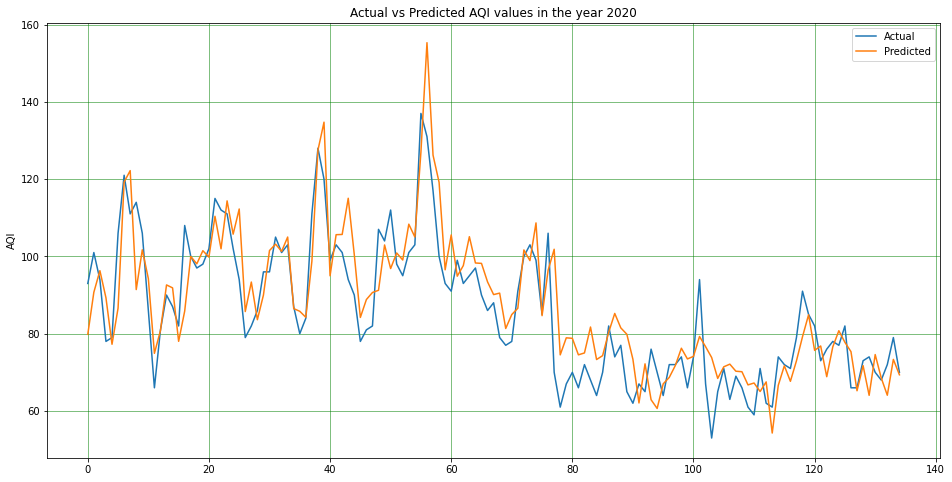

In [ ]:
df1 = pd.DataFrame({'Actual': data_actual[:135].flatten(), 'Predicted': data_predict[:135].flatten()})
df1.plot(kind='line',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs Predicted AQI values in the year 2020')
plt.ylabel('AQI')
plt.show()